# Assignment 3: Clustering California Housing with K-means

### CS 6316 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://amp.businessinsider.com/images/573de0b88d3eaea27198a55d-960-480.jpg)

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture 9 or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you (for free) from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

In [1]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Your code goes here for this section.
# X_train = [];
# X_test = [];

housing = pd.read_csv('housing.csv', error_bad_lines=False)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data Discovery

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


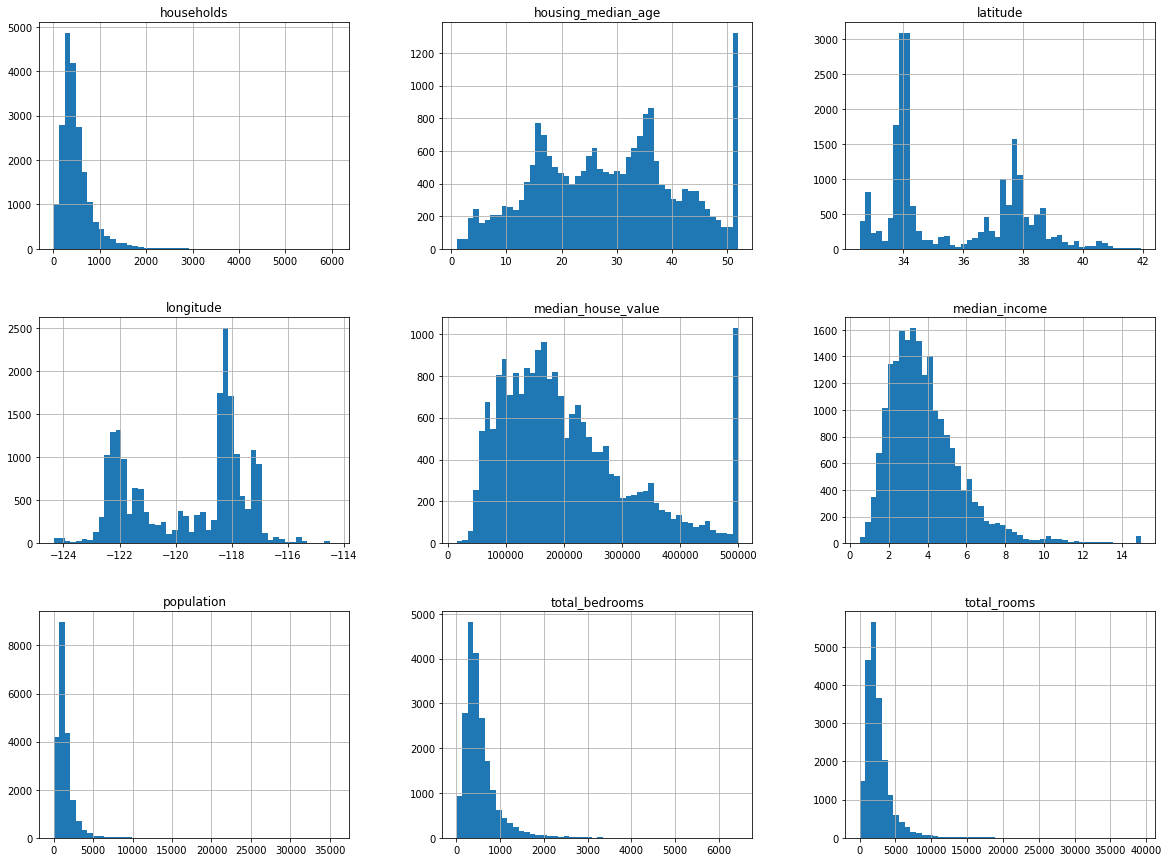

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt 
housing.hist(bins=50, figsize=(20,15)) 
plt.show()

## Data Visualization

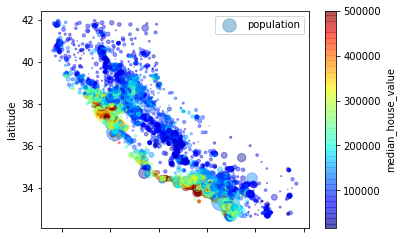

In [6]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, label="population", 
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
) 
plt.legend()

## Data Cleaning

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [8]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5) 
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index] 
    strat_test_set = housing.loc[test_index]
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [9]:
for set in (strat_train_set, strat_test_set): 
    set.drop(["income_cat"], axis=1, inplace=True)
housing1 = housing.drop("income_cat", axis=1)
#housing = strat_train_set.copy()

In [10]:
type(housing1)

pandas.core.frame.DataFrame

### Imputing

In [11]:
from sklearn.preprocessing import Imputer 
imputer = Imputer(strategy="median")
housing_num = housing1.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing1 = pd.DataFrame(X, columns=housing_num.columns)

In [12]:
housing1.shape

(20640, 9)

### keep location

In [13]:
long_la = housing1.iloc[:,[0,1]]
h = housing1.iloc[:,[2,8]]

### Pipelines for Feature Scaling and Categorical Features

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None):
        return self # nothing else to do 
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix] 
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin): 
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)), 
    ('imputer', Imputer(strategy="median")), 
    #('attribs_adder', CombinedAttributesAdder()), 
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)), 
    ('label_binarizer', MyLabelBinarizer()),
])

full_pipeline = FeatureUnion(transformer_list=[ 
    ("num_pipeline", num_pipeline), 
    ("cat_pipeline", cat_pipeline),
])


In [17]:
hp = full_pipeline.fit_transform(housing)
hp.shape

(20640, 14)

In [18]:
hp[0]

array([-1.32783522,  1.05254828,  0.98214266, -0.8048191 , -0.97247648,
       -0.9744286 , -0.97703285,  2.34476576,  2.12963148,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ])

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(hp)
hp_1 = np.c_[long_la, pca]

In [20]:
hp_1.shape

(20640, 4)

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster, and it can be represented just like a normal cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure**.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in gene assignment occurs between iterations.

**Distance Measures:** Your implementation must have an option of using two distance measures for clustering: 
- Euclidean distance: Euclidean distance measures differences in the absolute levels of instances.
$d(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}2]{\sum\limits_{i=1}^n|x_i - y_i|^2}$
- Spearson rank correlation: Spearson rank correlation uses ranks in place of absolute values, which makes it less sensitive to outliers (extremely high or low values) in the data.
$d(\mathbf{x},\mathbf{y}) = \frac{\sum_i (x^{(i)} - \bar{x})(y^{(i)} - \bar{y})}{\sqrt{\sum_i (x^{(i)} - \bar{x})^2 \sum_i (y^{(i)} - \bar{y})^2}}$

**Implementation Notes:** Note that these functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical. This requirement is already met for Euclidean distance, but Spearson rank correlation varies between -1 and 1, and high values indicate similarity. Therefore, you must transform the Spearson rank correlation so that the returned value is always greater than or equal to zero, with high values indicating dissimilarity.

In [1]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
import math
import copy
import numpy as np
import random
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class My_K_Means:
    def __init__(self):
        self.k = k
        #self.tolerance = tolerance
        #self.max_iterations = max_iterations
        self.data = data
        self.measure = m
    
    def Euclidean_distance(self, x1, x2):
        squared_distance = 0 #Assuming correct input to the function where the lengths of two features are the same
        for i in range(len(x1)):
            squared_distance += (x1[i] - x2[i])**2
            ed = math.sqrt(squared_distance)
        return ed
    
    def Spearson_rank_correlation(self, x1, x2):
        up = 0
        dl = 0
        dr = 0
        x1_ = np.mean(x1)
        x2_ = np.mean(x2)
        for i in range(len(x1)):
            up += (x1[i]-x1_)*(x2[i]-x2_)
            dl += (x1[i]-x1_)**2
            dr += (x2[i]-x2_)**2
        down = math.sqrt(dl*dr)
        src = up/down
        src = -src+1
        return src
    
    def _distance(self, x1, x2):
        if self.measure == 0:
            squared_distance = 0 #Assuming correct input to the function where the lengths of two features are the same
            for i in range(len(x1)):
                squared_distance += (x1[i] - x2[i])**2
                ed = math.sqrt(squared_distance)
            return ed
        else:
            up = 0
            dl = 0
            dr = 0
            x1_ = np.mean(x1)
            x2_ = np.mean(x2)
            for i in range(len(x1)):
                up += (x1[i]-x1_)*(x2[i]-x2_)
                dl += (x1[i]-x1_)**2
                dr += (x2[i]-x2_)**2
            down = math.sqrt(dl*dr)
            src = up/down
            src = -src+1
            return src
    
    def initCentroids(self, data, k):
    # randomly choose k data points from the set
        data = list(data)
        return random.sample(data, k)
    
    def minDistance(self, data, centroidList):

        # for each item in dataset, calculate the distance between this item and k centroids of clustering to find the smallest one
        # and assign the item to that centroid
        clusterDict = dict() #dict to save clustering results
        j = len(centroidList)
        for item in data:
            vec1 = item
            flag = -1
            minDis = float("inf") # initialize to maximum value
            for i in range(j):
                vec2 = centroidList[i]
                distance = self._distance(vec1, vec2)  # error
                if distance < minDis:
                    minDis = distance
                    flag = i  # at end of iteration, flag marks the centroid with smallest distance
            if flag not in clusterDict.keys():
                clusterDict.setdefault(flag, [])
            clusterDict[flag].append(item)  # add to a class accordingly
        return clusterDict  
    
    def getCentroids(self, clusterDict):
    # re-calculate k centroids 
        centroidList = []
        for key in clusterDict.keys():
            centroid = np.mean(clusterDict[key], axis=0)
            centroidList.append(centroid)
        return centroidList  
    
    def getVar(self, centroidList, clusterDict):
    # calculate each cluster's variance
    # sum up every point's distance with its centroid
        sum = 0.0
        for key in clusterDict.keys():
            vec1 = centroidList[key]
            distance = 0.0
            for item in clusterDict[key]:
                vec2 = item
                distance += self._distance(vec1, vec2)
            sum += distance
        return sum
    
    def showCluster(self, centroidList, clusterDict):
        california_img=mpimg.imread('california.png')
    # show clustering results
        colorMark = ['oC0', 'oC1', 'oC2', 'oC3', 'oC4', 'oC5','oC6', 'oC7','oC8','oC9'] # different colors to mark different clusters
        centroidMark = ['*C1', '*C2', '*C3', '*C4', '*C5','*C6','*C7','*C8', '*C9','*C0']
        plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
        plt.ylabel("Latitude", fontsize=14)
        plt.xlabel("Longitude", fontsize=14)

        for key in clusterDict.keys():        
            for item in clusterDict[key]:
                plt.plot(item[0], item[1], colorMark[key], markersize=4, alpha=0.7)
            plt.plot(centroidList[key][0], centroidList[key][1], centroidMark[key], markersize=20) #质心点
        
        plt.show()
        
    def SSE(self, centroidList, clusterDict):
        count = 0
        for key in clusterDict.keys():
            count = count + 1
        dist = np.zeros(count)
        for key in clusterDict.keys():
            m = centroidList[key]
            d = 0
            for item in clusterDict[key]:
                d += self.Euclidean_distance(item, m)
            dist[key] = d 
        sse = np.sum(dist)
        return sse
    
    def cluster_means(self, centroidList, clusterDict):
        count = 0
        for key in clusterDict.keys():
            count = count + 1
        means = np.zeros(count)
        for key in clusterDict.keys():
            means[key] = np.mean(centroidList[key])
        return means
    
    def within_cluster_std(self, centroidList, clusterDict):
        count = 0
        for key in clusterDict.keys():
            count = count + 1
        std = np.zeros(count)
        for key in clusterDict.keys():
            m = centroidList[key]
            std_t = 0
            for item in clusterDict[key]:
                std_t += self.Euclidean_distance(item, m)
            std[key] = math.sqrt(std_t)
        return std
    
    def test(self, data, k, measure):
        dataSet = self.data
        centroidList = self.initCentroids(dataSet,k)
        clusterDict = self.minDistance(dataSet, centroidList)
        # # getCentroids(clusterDict)
        # showCluster(centroidList, clusterDict)
        newVar = self.getVar(centroidList, clusterDict)
        oldVar = 1  # when the error bewteen the previous result and the current one is smaller than a certain value, the clustering has convereged
        times = 2
        while abs(newVar - oldVar) >= 0.001:
            centroidList = self.getCentroids(clusterDict)
            clusterDict = self.minDistance(dataSet, centroidList)
            oldVar = newVar
            newVar = self.getVar(centroidList, clusterDict)
            times += 1
        self.showCluster(centroidList, clusterDict)
        return centroidList, clusterDict

- - -
## 3. CLUSTERING HOUSING INTO REGIONS (30 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for 2 clusters to see if you can split California into a Northern and Southern regions.

**Cluster the data:** Write down the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

**Change the number of clusters:** Change K from 2 to 10 and repeat the clustering process above. Record cluster means and standard deviations. When you change K, do any additional patterns emerge? If so, what are they?
Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.

**Implementation Notes:** For each k, report the training and validation accuracy for EACH similarity measure. Identify the k with the highest validation accuracy, and report the test accuracy with this choice of k. Note: if multiple values of k result in the highest validation accuracy, then report test accuracies for all such values of k. Then, plot the data points with different markers corresponding to different classes. Repeat this process for all k and discuss the smoothness of the decision boundaries as k increases.


### Clustering Using Spearson Rank Correlation

In [23]:
data = hp_1
m = 1
k = 2
type(data)
km = My_K_Means()

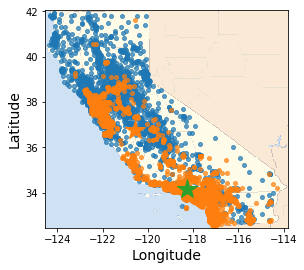

In [25]:
cL, cD = km.test(data, k, m)

In [32]:
for key in range(k):
    print("centroids",key,":",cL[key])

centroids 0 : [-120.58097533   36.78051937   -0.91748953    0.68296801]
centroids 1 : [-118.29381438   34.18263423    1.15756897   -0.86168022]


In [33]:
sse = km.SSE(cL, cD)
cmeans = km.cluster_means(cL, cD)
cstd = km.within_cluster_std(cL, cD)
print("SSE 2:", sse)
print("cluster means 2:", cmeans)
print("within cluster std 2:", cstd)

SSE 2: 54664.274202739456
cluster means 2: [-21.00874437 -20.95382285]
within cluster std 2: [180.17511231 149.00068156]


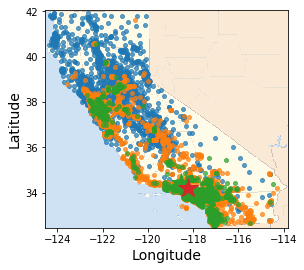

SSE 3 : 43603.7119511395
std. deviation 3 : [122.27331453 153.90810931  70.46447611]
cluster means 3 : [-20.8609162  -21.22101842 -19.95834521]
centroids 0 : [-121.35706971   37.70633746   -1.06017482    1.26724227]
centroids 1 : [-1.18553698e+02  3.44301223e+01  4.06325286e-02 -8.01130408e-01]
centroids 2 : [-118.22860548   34.22687128    4.57581789   -0.40746453]


In [34]:
k = 3
cL, cD = km.test(data, k, m)
sse = km.SSE(cL, cD)
print("SSE", k, ":", sse)
cstd = km.within_cluster_std(cL, cD)
print("std. deviation", k, ":", cstd)
cmeans = km.cluster_means(cL, cD)
print("cluster means",k, ":", cmeans) 
for key in range(k):
    print("centroids",key,":",cL[key])

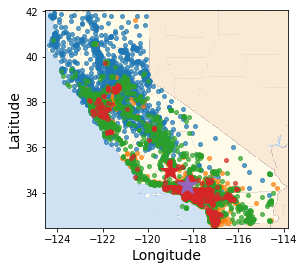

SSE 4 : 43627.82736888816
std. deviation 4 : [101.50874134  98.18933033 147.14786177  45.0573522 ]
cluster means 4 : [-20.82980448 -20.92896066 -21.25533    -19.07441795]
centroid 0 : [-121.58683057   38.00496856   -1.18426703    1.44691112]
centroid 1 : [-118.20143555   34.08925       1.31771948   -0.92137656]
centroid 2 : [-119.02667583   34.93721764   -0.44093357   -0.49092825]
centroid 3 : [-1.18264668e+02  3.43405963e+01  7.57859411e+00  4.78056321e-02]


In [35]:
k = 4
cL, cD = km.test(data, k, m)
sse = km.SSE(cL, cD)
print("SSE", k, ":", sse)
cstd = km.within_cluster_std(cL, cD)
print("std. deviation", k, ":", cstd)
cmeans = km.cluster_means(cL, cD)
print("cluster means",k, ":", cmeans)
for key in range(k):
    print("centroid",key,":",cL[key])

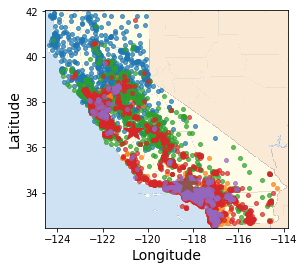

SSE 5 : 41155.35763525663
std. deviation 5 : [ 74.14129578  80.89763788 113.45841938 120.84206199  40.47692189]
cluster means 5 : [-20.78982    -20.74612717 -20.98243751 -21.2996511  -18.80937331]
centroid 0 : [-121.79952668   38.42417784   -1.48490323    1.70097205]
centroid 1 : [-118.18338502   34.08827092    1.94548204   -0.83487662]
centroid 2 : [-120.64295114   36.71086432   -0.66504314    0.66737993]
centroid 3 : [-118.52320175   34.38932707   -0.20226742   -0.86246227]
centroid 4 : [-118.29473333   34.39333333    8.46240971    0.20149705]


In [36]:
k = 5
cL, cD = km.test(data, k, m)
sse = km.SSE(cL, cD)
print("SSE", k, ":", sse)
cstd = km.within_cluster_std(cL, cD)
print("std. deviation", k, ":", cstd)
cmeans = km.cluster_means(cL, cD)
print("cluster means",k, ":", cmeans)
for key in range(k):
    print("centroid",key,":",cL[key])

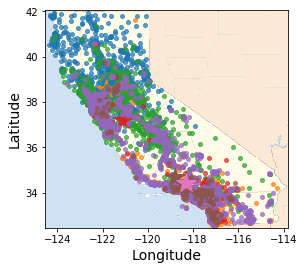

SSE 6 : 39841.606400564364
std. deviation 6 : [ 66.20519076  91.23886145  95.34366038  54.15812837 120.05773586
  26.39266748]
cluster means 6 : [-20.75540081 -21.08765317 -20.91850455 -20.16578528 -21.30920012
 -17.87174031]
centroid 0 : [-121.8319179    38.58789583   -1.57477429    1.79719311]
centroid 1 : [-118.2146524    34.084316      0.77635453   -0.99663082]
centroid 2 : [-121.11297058   37.21386629   -0.75093031    0.97601639]
centroid 3 : [-118.23493845   34.22527154    3.84257654   -0.49605073]
centroid 4 : [-118.82238611   34.71027064   -0.48383361   -0.6408514 ]
centroid 5 : [-118.30115385   34.42934066   11.75511398    0.62973798]


In [37]:
k = 6
cL, cD = km.test(data, k, m)
sse = km.SSE(cL, cD)
print("SSE", k, ":", sse)
cstd = km.within_cluster_std(cL, cD)
print("std. deviation", k, ":", cstd)
cmeans = km.cluster_means(cL, cD)
print("cluster means",k, ":", cmeans)
for key in range(k):
    print("centroid",key,":",cL[key])

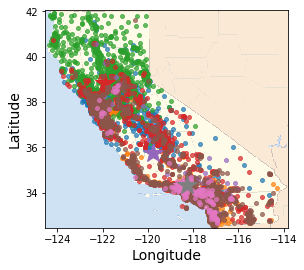

SSE 7 : 39571.226101067514
std. deviation 7 : [ 75.41315167  76.87148427  56.67282837 111.06627514  45.77597329
  98.84449453  23.69929924]
cluster means 7 : [-20.89330894 -20.91606685 -20.69518563 -21.13905843 -19.92196769
 -21.31699788 -17.69612048]
centroid 0 : [-121.50625162   37.65711543   -0.96816271    1.24406315]
centroid 1 : [-118.18979592   34.07504082    1.36474242   -0.91425472]
centroid 2 : [-121.87614096   38.84232627   -1.68299736    1.93606954]
centroid 3 : [-1.19758117e+02  3.57355673e+01 -6.01624503e-01  6.79404990e-02]
centroid 4 : [-118.23967638   34.26333333    4.66070691   -0.37223461]
centroid 5 : [-118.43315983   34.29887197   -0.19130426   -0.9423994 ]
centroid 6 : [-118.26946309   34.34597315   12.48667656    0.65233144]


In [38]:
k = 7
cL, cD = km.test(data, k, m)
sse = km.SSE(cL, cD)
print("SSE", k, ":", sse)
cstd = km.within_cluster_std(cL, cD)
print("std. deviation", k, ":", cstd)
cmeans = km.cluster_means(cL, cD)
print("cluster means",k, ":", cmeans)
for key in range(k):
    print("centroid",key,":",cL[key])

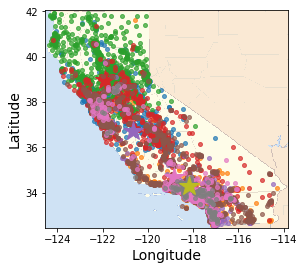

SSE 8 : 38353.77389315271
std. deviation 8 : [ 64.10811681  83.34118532  50.91791305  90.06125358  64.14731345
 102.58727944  38.20043709  22.27567499]
cluster means 8 : [-20.88802469 -21.23067461 -20.6688261  -20.95326827 -20.73367401
 -21.32569694 -19.6792583  -17.53356111]
centroid 0 : [-121.64213762   37.85248805   -1.13805499    1.37560579]
centroid 1 : [-118.24075598   34.1085775     0.25861894   -1.04913889]
centroid 2 : [-121.90181146   38.97668515   -1.75258094    2.00240283]
centroid 3 : [-120.64413201   36.72496685   -0.57602765    0.68211972]
centroid 4 : [-118.19060068   34.09814298    1.97312965   -0.815368  ]
centroid 5 : [-118.83278877   34.70696082   -0.54178894   -0.63517085]
centroid 6 : [-118.28411128   34.33462133    5.46913079   -0.23667403]
centroid 7 : [-118.20134921   34.27960317   13.10873577    0.67876582]


In [39]:
k = 8
cL, cD = km.test(data, k, m)
sse = km.SSE(cL, cD)
print("SSE", k, ":", sse)
cstd = km.within_cluster_std(cL, cD)
print("std. deviation", k, ":", cstd)
cmeans = km.cluster_means(cL, cD)
print("cluster means",k, ":", cmeans)
for key in range(k):
    print("centroid",key,":",cL[key])

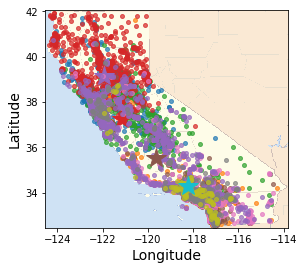

SSE 9 : 37926.06380018013
std. deviation 9 : [56.43574515 77.36164912 73.47604088 45.49362946 96.39715391 57.67959941
 83.62888983 35.45254888 20.4407657 ]
cluster means 9 : [-20.8824277  -21.13971709 -20.89845168 -20.61826954 -21.16200087
 -20.60860091 -21.37094777 -19.55890322 -17.4034634 ]
centroid 0 : [-121.72953452   38.00813033   -1.29919422    1.49088762]
centroid 1 : [-118.23491195   34.09399413    0.58374675   -1.00169728]
centroid 2 : [-121.12732118   37.26308116   -0.70469999    0.97513328]
centroid 3 : [-121.92388712   39.15990461   -1.79765199    2.08855635]
centroid 4 : [-1.19621882e+02  3.55426367e+01 -5.62141078e-01 -6.61707131e-03]
centroid 5 : [-118.21833871   34.14698387    2.36825808   -0.73130687]
centroid 6 : [-118.46099771   34.34419037   -0.41563299   -0.95135075]
centroid 7 : [-118.22810313   34.29535912    5.88976871   -0.1926376 ]
centroid 8 : [-118.22026786   34.29178571   13.5812214     0.73340715]


In [40]:
k = 9
cL, cD = km.test(data, k, m)
sse = km.SSE(cL, cD)
print("SSE", k, ":", sse)
cstd = km.within_cluster_std(cL, cD)
print("std. deviation", k, ":", cstd)
cmeans = km.cluster_means(cL, cD)
print("cluster means",k, ":", cmeans)
for key in range(k):
    print("centroid",key,":",cL[key])

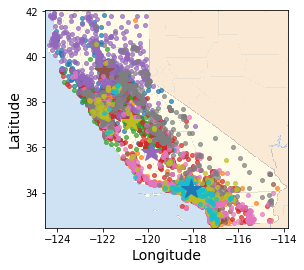

SSE 10 : 37957.59768351807
std. deviation 10 : [51.2138746  79.13642353 55.73241069 93.33721674 40.55101424 57.9529087
 89.053877   51.57023779 35.60710394 19.83312644]
cluster means 10 : [-20.86678311 -21.15199405 -20.86199054 -21.09497448 -20.55597209
 -20.60073038 -21.36125807 -21.01865869 -19.5090913  -17.36043578]
centroid 0 : [-121.76909785   38.16107399   -1.4396262     1.58051764]
centroid 1 : [-118.22751651   34.08904012    0.55138458   -1.02088439]
centroid 2 : [-121.51668004   37.52360963   -0.79222816    1.3373364 ]
centroid 3 : [-119.86707261   35.8090264    -0.52777348    0.20592176]
centroid 4 : [-121.95745587   39.3709865    -1.82102937    2.18361038]
centroid 5 : [-118.21591421   34.14647185    2.39263185   -0.72611102]
centroid 6 : [-118.53805986   34.41563999   -0.44238381   -0.88022861]
centroid 7 : [-120.72494819   37.13120898   -0.90536171    0.42446616]
centroid 8 : [-118.26754221   34.33401501    6.04371131   -0.14654932]
centroid 9 : [-118.10893204   34.1720388

In [41]:
k = 10
cL, cD = km.test(data, k, m)
sse = km.SSE(cL, cD)
print("SSE", k, ":", sse)
cstd = km.within_cluster_std(cL, cD)
print("std. deviation", k, ":", cstd)
cmeans = km.cluster_means(cL, cD)
print("cluster means",k, ":", cmeans)
for key in range(k):
    print("centroid",key,":",cL[key])

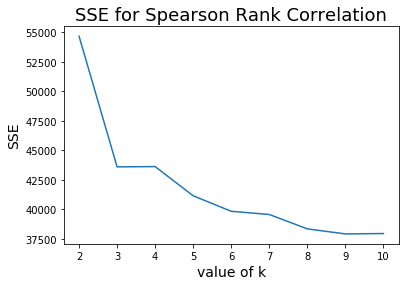

In [14]:
import numpy as np
SSE_set = np.zeros(9)
SSE_set[0] = 54664.274202739456
SSE_set[1] = 43603.7119511395
SSE_set[2] = 43627.82736888816
SSE_set[3] = 41155.35763525663
SSE_set[4] = 39841.606400564364
SSE_set[5] = 39571.226101067514
SSE_set[6] = 38353.77389315271
SSE_set[7] = 37926.06380018013
SSE_set[8] = 37957.59768351807
index = np.zeros(9)
for i in range(1,10):
    index[i-1] = i

plt.title("SSE for Spearson Rank Correlation", fontsize=18)    
plt.ylabel("SSE", fontsize=14)
plt.xlabel("value of k", fontsize=14)
plt.plot(index+1, SSE_set)



### Clustering Using Euclidean Distance

In [22]:
data = hp_1
m = 0
k = 2

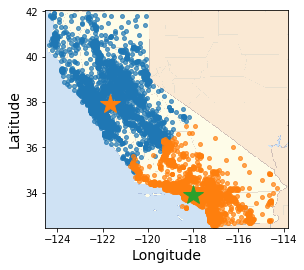

SSE 2 : 38099.07740776775
std. deviation 2 : [130.97881075 144.71913675]
cluster means 2 : [-20.66091169 -21.22766487]
centroids 0 : [-121.67244214   37.92456362   -0.34060876    1.44484053]
centroids 1 : [-117.98912671   33.9084919     0.25602748   -1.08605216]


In [23]:
km = My_K_Means()
cL, cD = km.test(data, k, m)
sse = km.SSE(cL, cD)
print("SSE", k, ":", sse)
cstd = km.within_cluster_std(cL, cD)
print("std. deviation", k, ":", cstd)
cmeans = km.cluster_means(cL, cD)
print("cluster means",k, ":", cmeans) 
for key in range(k):
    print("centroids",key,":",cL[key])

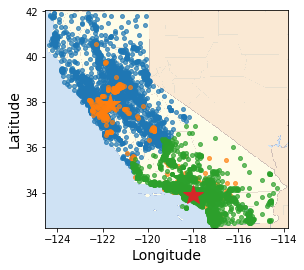

SSE 3 : 34424.52307426496
std. deviation 3 : [124.87360065  58.58059941 124.09440079]
cluster means 3 : [-20.70177028 -19.4286928  -21.34789342]
centroids 0 : [-121.67686238   37.93237628   -0.49300066    1.43040565]
centroids 1 : [-1.18543354e+02  3.46289596e+01  6.11234330e+00  8.72794405e-02]
centroids 2 : [-117.99873053   33.90612695   -0.16186114   -1.13710894]


In [24]:
k = 3
cL, cD = km.test(data, k, m)
sse = km.SSE(cL, cD)
print("SSE", k, ":", sse)
cstd = km.within_cluster_std(cL, cD)
print("std. deviation", k, ":", cstd)
cmeans = km.cluster_means(cL, cD)
print("cluster means",k, ":", cmeans) 
for key in range(k):
    print("centroids",key,":",cL[key])

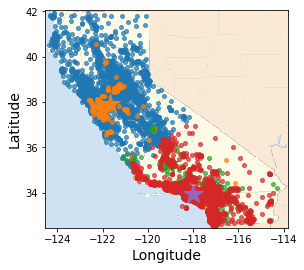

SSE 4 : 31641.157966416493
std. deviation 4 : [125.33103446  41.70502422  64.30005805 100.29697531]
cluster means 4 : [-20.69750265 -18.51896238 -20.70605051 -21.4757838 ]
centroids 0 : [-121.67915381   37.93339051   -0.47664831    1.432401  ]
centroids 1 : [-119.11400978   35.26982885    8.91143537    0.85689605]
centroids 2 : [-117.91016306   33.88913151    2.08051356   -0.88368406]
centroids 3 : [-118.0274381    33.92086084   -0.61597187   -1.18058607]


In [25]:
k = 4
cL, cD = km.test(data, k, m)
sse = km.SSE(cL, cD)
print("SSE", k, ":", sse)
cstd = km.within_cluster_std(cL, cD)
print("std. deviation", k, ":", cstd)
cmeans = km.cluster_means(cL, cD)
print("cluster means",k, ":", cmeans) 
for key in range(k):
    print("centroids",key,":",cL[key])

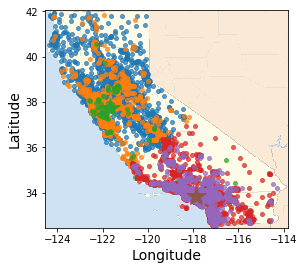

SSE 5 : 29319.62201803028
std. deviation 5 : [101.54060436  58.40160727  34.48837776 102.57316882  62.35123728]
cluster means 5 : [-20.83632889 -20.17074573 -18.23277423 -21.46436176 -20.65105451]
centroids 0 : [-121.67705656   37.97989044   -1.05236196    1.40421254]
centroids 1 : [-121.67777392   37.75645513    1.69281819    1.54551767]
centroids 2 : [-118.71072414   34.87493103   10.14544747    0.75924871]
centroids 3 : [-118.02885027   33.9221992    -0.57598318   -1.17481278]
centroids 4 : [-117.87734153   33.8729466     2.27471521   -0.87453833]


In [26]:
k = 5
cL, cD = km.test(data, k, m)
sse = km.SSE(cL, cD)
print("SSE", k, ":", sse)
cstd = km.within_cluster_std(cL, cD)
print("std. deviation", k, ":", cstd)
cmeans = km.cluster_means(cL, cD)
print("cluster means",k, ":", cmeans) 
for key in range(k):
    print("centroids",key,":",cL[key])

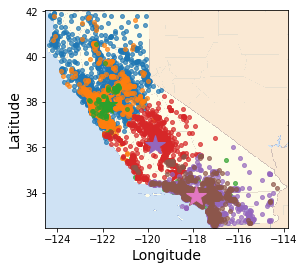

SSE 6 : 27255.679515693046
std. deviation 6 : [90.30429709 53.67992176 33.54131259 46.60809408 96.78125172 59.62662724]
cluster means 6 : [-20.8347042  -20.13104662 -18.1637699  -20.90746294 -21.47676727
 -20.61444474]
centroids 0 : [-121.9454547    38.17647504   -1.06387452    1.49403739]
centroids 1 : [-121.82144358   37.87221792    1.8181158     1.60692337]
centroids 2 : [-118.70494505   34.88571429   10.36899852    0.79515265]
centroids 3 : [-119.70294046   36.08761239   -0.57457239    0.56004872]
centroids 4 : [-117.9201891    33.82158165   -0.54141877   -1.26704287]
centroids 5 : [-117.87745932   33.86871089    2.41768056   -0.86671109]


In [27]:
k = 6
cL, cD = km.test(data, k, m)
sse = km.SSE(cL, cD)
print("SSE", k, ":", sse)
cstd = km.within_cluster_std(cL, cD)
print("std. deviation", k, ":", cstd)
cmeans = km.cluster_means(cL, cD)
print("cluster means",k, ":", cmeans) 
for key in range(k):
    print("centroids",key,":",cL[key])

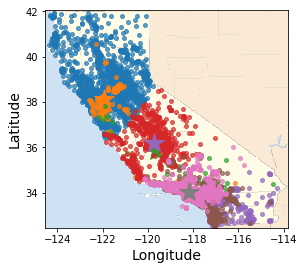

SSE 7 : 26726.000642248502
std. deviation 7 : [113.53061874  33.38283287  37.04477056  46.42509743  41.20518336
  55.16911022  66.73292414]
cluster means 7 : [-20.68774412 -17.94232874 -20.00219397 -20.86644775 -21.50098758
 -20.97124068 -21.54565909]
centroids 0 : [-121.93345514   38.11832482   -0.45460826    1.51876209]
centroids 1 : [-119.65126582   35.82962025   10.62825417    1.42407643]
centroids 2 : [-117.93058965   34.00574007    4.44244637   -0.52637266]
centroids 3 : [-119.73164822   36.17867159   -0.53617899    0.62336464]
centroids 4 : [-116.99961584   33.01062648   -0.32758058   -1.68738038]
centroids 5 : [-117.98472892   33.93244311    1.16552731   -0.99820423]
centroids 6 : [-118.16972474   34.02365122   -0.85173811   -1.18482473]


In [28]:
k = 7
cL, cD = km.test(data, k, m)
sse = km.SSE(cL, cD)
print("SSE", k, ":", sse)
cstd = km.within_cluster_std(cL, cD)
print("std. deviation", k, ":", cstd)
cmeans = km.cluster_means(cL, cD)
print("cluster means",k, ":", cmeans) 
for key in range(k):
    print("centroids",key,":",cL[key])

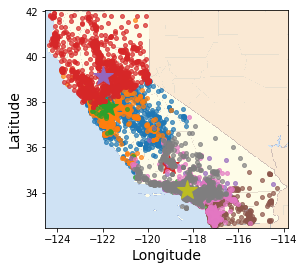

SSE 8 : 25361.14229531186
std. deviation 8 : [83.57495294 51.59857777 27.64251807 55.96162151 35.93492038 43.74534937
 56.89232716 73.32416679]
cluster means 8 : [-20.98591448 -20.09294101 -17.64815341 -20.41755356 -19.98745293
 -21.49584485 -20.95804873 -21.51992489]
centroids 0 : [-121.49607967   37.43564189   -0.95515364    1.07193349]
centroids 1 : [-121.76263763   37.79311555    1.98799978    1.60975826]
centroids 2 : [-119.07609195   35.21097701   12.08361612    1.18888516]
centroids 3 : [-122.00067837   39.1682685    -0.99502406    2.15721968]
centroids 4 : [-117.8343213    33.93435866    4.51318947   -0.56303856]
centroids 5 : [-117.04594054   33.05152973   -0.29399207   -1.69497653]
centroids 6 : [-118.05454724   33.99800853    1.164996     -0.9406522 ]
centroids 7 : [-118.26319906   34.1175611    -0.8560141    -1.07804749]


In [29]:
k = 8
cL, cD = km.test(data, k, m)
sse = km.SSE(cL, cD)
print("SSE", k, ":", sse)
cstd = km.within_cluster_std(cL, cD)
print("std. deviation", k, ":", cstd)
cmeans = km.cluster_means(cL, cD)
print("cluster means",k, ":", cmeans) 
for key in range(k):
    print("centroids",key,":",cL[key])

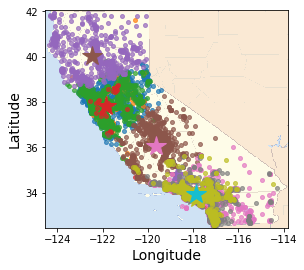

SSE 9 : 23591.454575515556
std. deviation 9 : [65.8822782  30.07153155 51.58130217 24.77119004 35.91760624 45.53939557
 79.33682892 63.43232719 37.28990285]
cluster means 9 : [-21.00602507 -19.4969592  -20.50313588 -17.54716745 -20.18687063
 -20.89967686 -21.56221982 -21.04217859 -20.01494688]
centroids 0 : [-121.85725347   37.87294375   -1.32009976    1.28030921]
centroids 1 : [-121.74515888   37.88558879    3.97065889    1.9010744 ]
centroids 2 : [-121.83375212   37.83318336    0.56150068    1.42652457]
centroids 3 : [-118.70380952   34.79183673   12.73175725    0.99154574]
centroids 4 : [-122.45287222   40.03307151   -1.02142067    2.69373886]
centroids 5 : [-119.65356648   36.0500189    -0.54144526    0.5462854 ]
centroids 6 : [-117.94953886   33.84577798   -0.85654719   -1.28857122]
centroids 7 : [-117.84929531   33.78224568    1.00163608   -1.10330082]
centroids 8 : [-117.85459837   33.94625146    4.41209485   -0.56353547]


In [30]:
k = 9
cL, cD = km.test(data, k, m)
sse = km.SSE(cL, cD)
print("SSE", k, ":", sse)
cstd = km.within_cluster_std(cL, cD)
print("std. deviation", k, ":", cstd)
cmeans = km.cluster_means(cL, cD)
print("cluster means",k, ":", cmeans) 
for key in range(k):
    print("centroids",key,":",cL[key])

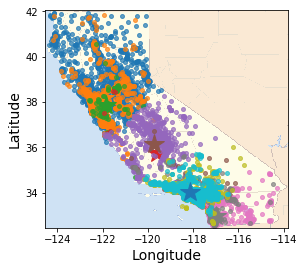

SSE 10 : 23275.171062492675
std. deviation 10 : [89.8337597  53.3002275  24.54570296 11.62270761 44.67979955 25.58408715
 41.69153137 40.5268046  55.52310977 50.12307016]
cluster means 10 : [-20.83677689 -20.15270191 -18.17631219 -15.90056559 -20.88391734
 -19.71856306 -21.47969384 -20.65504268 -21.61266196 -21.20791611]
centroids 0 : [-121.94764228   38.17848238   -1.07289567    1.49494801]
centroids 1 : [-121.82903562   37.87853699    1.74308742    1.59660355]
centroids 2 : [-119.59928571   35.75041667    9.86010348    1.28351681]
centroids 3 : [-118.38617647   34.44294118   18.82743289    1.51354003]
centroids 4 : [-119.72505089   36.16729644   -0.59104171    0.6131268 ]
centroids 5 : [-117.81071269   33.9311804     5.45448593   -0.44920588]
centroids 6 : [-116.98132319   32.98871194   -0.25239645   -1.67376769]
centroids 7 : [-117.8877037    33.88214815    2.2737164    -0.88833157]
centroids 8 : [-118.16798502   34.02060613   -1.08873644   -1.2145325 ]
centroids 9 : [-118.11920857 

In [31]:
k = 10
cL, cD = km.test(data, k, m)
sse = km.SSE(cL, cD)
print("SSE", k, ":", sse)
cstd = km.within_cluster_std(cL, cD)
print("std. deviation", k, ":", cstd)
cmeans = km.cluster_means(cL, cD)
print("cluster means",k, ":", cmeans) 
for key in range(k):
    print("centroids",key,":",cL[key])

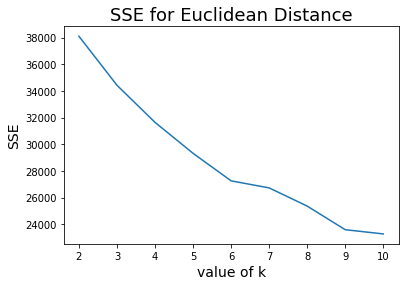

In [13]:
import numpy as np
SSE_set = np.zeros(9)
SSE_set[0] = 38099.07740776775
SSE_set[1] = 34424.52307426496
SSE_set[2] = 31641.157966416493
SSE_set[3] = 29319.62201803028
SSE_set[4] = 27255.679515693046
SSE_set[5] = 26726.000642248502
SSE_set[6] = 25361.14229531186
SSE_set[7] = 23591.454575515556
SSE_set[8] = 23275.171062492675
index = np.zeros(9)
for i in range(1,10):
    index[i-1] = i

plt.title("SSE for Euclidean Distance", fontsize=18)
plt.ylabel("SSE", fontsize=14)
plt.xlabel("value of k", fontsize=14)
plt.plot(index+1, SSE_set)



### Paragraph
Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to?

About the clusters that were found, we can say that the std. deviation varies a lot from cluster to cluster, and the centroids are more likely to fall on locations where the big cities are. For example, we can always find centroids located in somewhere very close to LA, SJ or SF regardless of the number of clusters we have. Some data points always get into the same cluster even though their physical distances are quite obvious. If we check the real map of California, we can match these points to the areas that are known to have higher population and housing prices.
Combined with the background information about cities in California, I think this more or less reflects the differences of development status between those big cities and other areas in CA, which leads to the results of clustering. In developing and advanced economies alike, cities struggle with the dual challenges of housing their poorest citizens and providing housing at a reasonable cost for middle-income households.

In [2]:
# Your code goes here


# Your paragraph goes here for this section

- - -
## 4. WRITE ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (20 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting). Additionally, did you have any insight on which similarity measure (either Eucledean or Spearson Correlation) work better in this dataset.

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge. 



### Answer
It is necessary for us to try on more numbers of clusters when we do clustering on a dataset when the clustering result is not very easy to predict before we really run the program. Also it is important to choose a proper similarity measure for certain datasets. 
For this dataset, simply using Eucledean distance does not give a very satisfying clustering result. It just devide the points according to their locations, but we cannot interpret more information from the results. The reason is that the features in the dataset, like population, median house value or median income to be more specific, cannot be represented by the physical distance. Therefore we should consider about their correlation with each other to determine the similarity when we do clustering.
According to the clustering results of the California Housing, it is not hard to tell that there are obvious gaps between areas with different satus of development. For those big cities such as LA and SF, the housing prices could be quite high compared with areas like mid CA. The problem could be both rural and urban. While metropolises such as LA and SF suffer from high housing prices, so do rural communities such as Watsonville and Salinas.

#### Possible solutions:
Quantify California's housing affordability gap to figure out the size and distribution of the problem, then identify the spots where large amounts of housing could be developed, with return considered. No enough housing might be the root problem of housing crisis in California, so more construction of housing would help. 
To achieve this, efforts should be made to ensure building becomes easier;
A permanent source of founding for housing should be created;
Build more inexpensive "affordable" housing and redefine the notion of how much space one need to live comfortably, which means to increase density.


- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS6316 Assignment 3:...".

Best of luck and have fun!